# CE444: Geotechnical Design, Homework Assignment 4

Completed by Brandon Auyeung for Dr. Arash Khosravifar.

Assigned 10th of Feb., 2026. Due 15th of Feb., 2026.

## Problem 1

### Part A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from icecream import ic
#test

In [2]:
# collect N_measured from SPT7, SPT9, and SPT12
# N_meas = np.array([15, 9, 5])
# z = np.array([7.8, 9.8, 12.8]) # starting depth of SPTs in meters    
# what about N_measured as for avgN60? use this code line instea+
N_meas = np.array([9,15,10,9,9,8,5,9]) # from SPT6 to SPT13
z = np.array([6.8, 7.8, 8.8, 9.8, 10.8, 11.8, 12.8, 13.8])

ic(z)
# N from N_meas
N = np.zeros(len(N_meas))
for index, value in enumerate(N_meas):
    if value <= 15:
        N[index] = value
    else:
        N[index] = 15 + (value - 15) / 2
ic(N)

# correction factors 
Ch = 5/6
Cs = 1
Cd = 1.05
Cr = np.zeros(len(N_meas)) # initialize rod length correction factor
for index, value in enumerate(z):
    if value < 4:
        Cr[index] = 0.75
    elif 4 <= value < 6:
        Cr[index] = 0.85
    elif 6 <= value < 10:
        Cr[index] = 0.95
    else:
        Cr[index] = 1

# calculate N_corrected
N_corrected = N_meas * Ch * Cs * Cd * Cr
ic(N_corrected)
# ic(np.average(N_corrected)) # should be equal to 7.9...?
ic(Cr)
N60 = float(np.average(N_corrected))
ic(N60)

ic| z: array([ 6.8,  7.8,  8.8,  9.8, 10.8, 11.8, 12.8, 13.8])
ic| N: array([ 9., 15., 10.,  9.,  9.,  8.,  5.,  9.])
ic| N_corrected: array([ 7.48125, 12.46875,  8.3125 ,  7.48125,  7.875  ,  7.     ,
                         4.375  ,  7.875  ])
ic| Cr: array([0.95, 0.95, 0.95, 0.95, 1.  , 1.  , 1.  , 1.  ])
ic| N60: 7.85859375


7.85859375

In [3]:
N_table = pd.DataFrame({'SPT': np.arange(6, 14, 1),  'z': z, 'N_corrected': N_corrected})
ic(N_table)
print(N_table.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
SPT & z & N_corrected \\
\midrule
6 & 6.800000 & 7.481250 \\
7 & 7.800000 & 12.468750 \\
8 & 8.800000 & 8.312500 \\
9 & 9.800000 & 7.481250 \\
10 & 10.800000 & 7.875000 \\
11 & 11.800000 & 7.000000 \\
12 & 12.800000 & 4.375000 \\
13 & 13.800000 & 7.875000 \\
\bottomrule
\end{tabular}



ic| N_table:    SPT     z  N_corrected
             0    6   6.8      7.48125
             1    7   7.8     12.46875
             2    8   8.8      8.31250
             3    9   9.8      7.48125
             4   10  10.8      7.87500
             5   11  11.8      7.00000
             6   12  12.8      4.37500
             7   13  13.8      7.87500


### Part B

In [4]:
from bAuyeung_Settlement_CE444 import Foundation

# define foundation
sand_found = Foundation(B = 30, L = 50, D = 5.6 + 1.2, H = 14.8 - 6.8, thickness = 1.2, point_load = 125*1000, gamma = 24) # define parameters for foundation
sand_found.influence_depth() # determine the influence depth of the foundation
sand_found.sand(gamma_soil=17, gwt = 4.8, avgN60=N60, excavation=6.8) # define parameters for soil
sand_found.settlement_sand(0, deep_soil = False) # determine the settlement of the foundation
sand_found.display_foundation()
sand_found.display_sand()
sand_found.display_factors()
sand_found.display_results()


Time of Settlement Considered: 0 yrs
OCNC Settlement Case
Unit System: m, kPa, kN/m^3
Foundation Short Side: 30
Foundation Long Side: 50
Foundation Depth: 6.8
Foundation Thickness: 1.2
Stress considered: 112.13333333333333
Depth from bottom of Foundation to Stiff Layer: 8.0
Unit Weight of Foundation: 24

Unit System: m, kPa, kN/m^3
Unit Weight of Soil: 17
Average N60: 7.85859375
Groundwater table depth: 4.8
Excavation is present to depth 6.8

Unit System: m, kPa, kN/m^3
Influence Depth: 14.68675300699949
Layer Thickness Factor: 0.7927096996085646
Compressibility Index: 0.09539230358476941
Shape Factor: 1.1814744801512287
Time Factor: 1
Preconsolidation Stress: 95.97999999999999

Unit System: m, kPa, kN/m^3
Stress considered: 112.13333333333333
Settlement: 0.04651606378787245



# Problem 2

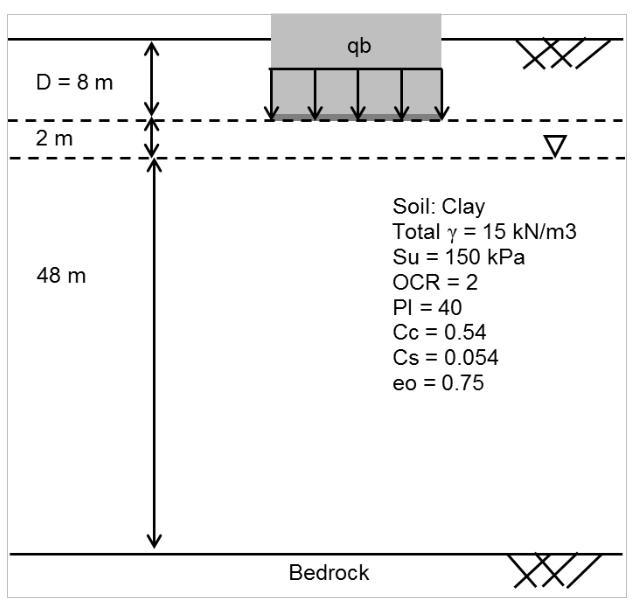

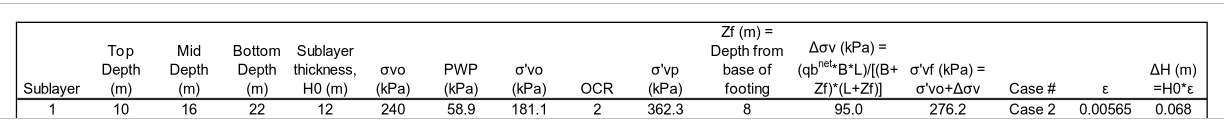

## Part A 

In [5]:
midpoints = np.arange(12, 49, 12) + 6 # middle of clay sublayers till bedrock
ic(midpoints) 

# define foundation 
clay_found = Foundation(B = 30, L = 100, D = 8, H = 50, thickness = 0, point_load = 0, gamma = 0 ) # need to define a surcharge value to replace point, point load, gamma
clay_found.influence_depth() # determine the influence depth of the foundation
clay_found.clay(gamma_soil=15, gwt = 10, Su = 150, PI = 40, K = 400, e0 = 0.75, OCR = 2, excavation=6.8) # define parameters for soil
clay_found.settlement_clay(points=midpoints, Cc = 0.54, Cr = 0.054, I0 = 0.95, I1 =0.575, layer_thickness=12) # determine the settlement of the foundation




OCNC Settlement Case
OCNC Settlement Case
OCNC Settlement Case
OCNC Settlement Case

Immediate Settlement:  0.0

Settlement in Clay Layers:  [-1.00320396 -1.00320396 -1.00320396 -1.00320396]



ic| midpoints: array([18, 30, 42, 54])


## Part B

## Part C